<a href="https://colab.research.google.com/github/Hkhero79/HK-Credit-card-default-prediction/blob/main/HK_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
file_path = '/content/drive/MyDrive/Data & Resources/default of credit card clients.xls'

In [57]:
df=pd.read_excel(file_path,header=1)

In [58]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [59]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [60]:
df.shape

(30000, 25)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [62]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [63]:
#checking null values 
df.isna().sum()
df.dropna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [64]:
df_cred=df.copy()

In [65]:
df_cred.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**EDA**

In [66]:
#renaming the column 
df_cred.rename(columns={'default payment next month' : 'Defaulter for next month'}, inplace=True)

In [67]:
df_cred.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter for next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**DEPENDENT** **VARIABLE**

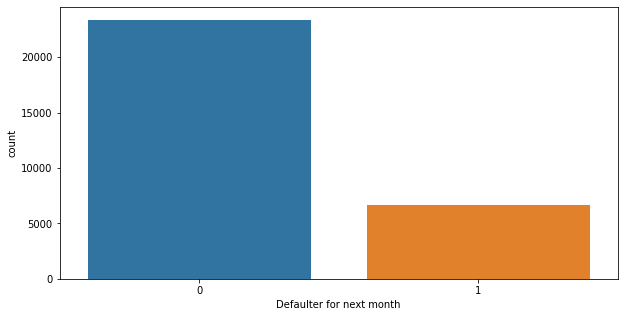

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(df_cred['Defaulter for next month'], data = df_cred)


In [69]:
#lets rename the the column and make them more understanblw
df_cred.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':
                   'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df_cred.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG',
                   'BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df_cred.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL',
                   'PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

**LETS EXPLORE OUR SOME INDEPENDENT VARIABLE**

In [70]:
df_cred.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter for next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**LETS EXPLORE OUR CATEGORICAL FEATURES**

**EDUCATION**

**SEX**

**MARRIAGE**



**EDUCATION**

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [71]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

AS we can see that our column of education has value like 5,6,0 which does not have description so will add those value in 4 i.e others

In [72]:
val = (df_cred['EDUCATION'] == 5) | (df_cred['EDUCATION'] == 6) | (df_cred['EDUCATION'] == 0)
df.loc[val, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

SEX

1 - Male,2 - Female

In [73]:
df_cred['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Marriage

1 = married; 2 = single; 3 = others

In [74]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [75]:
fi = df['MARRIAGE'] == 0
df.loc[fi, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [76]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [77]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df_cred['Defaulter for next month']

In [78]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' :  {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 720x360 with 0 Axes>

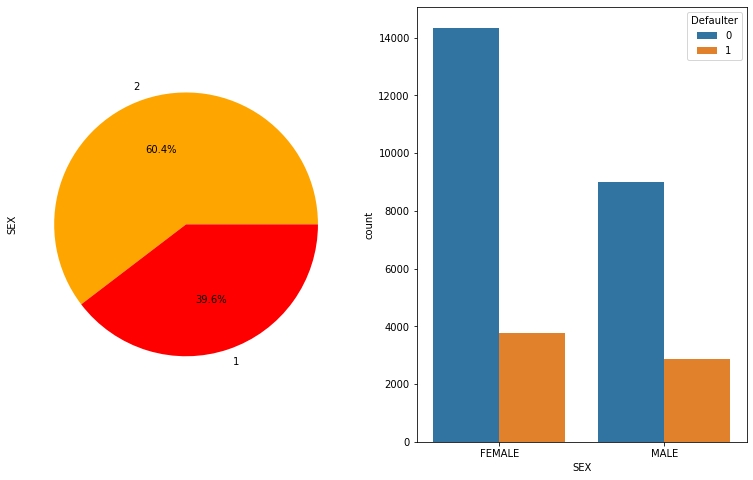

<Figure size 720x360 with 0 Axes>

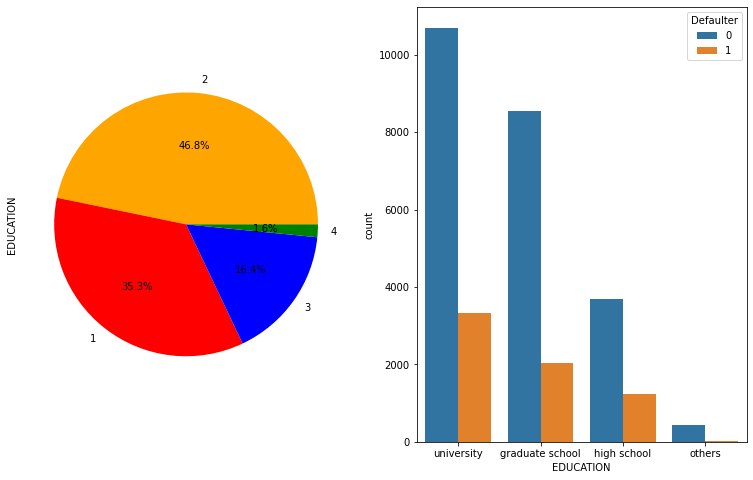

<Figure size 720x360 with 0 Axes>

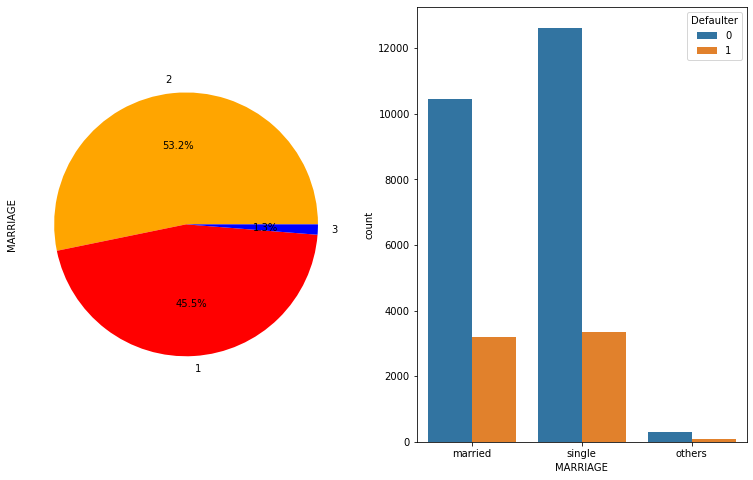

In [79]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],autopct='%1.1f%%', colors = ['orange','red','blue','green'],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

No. of defaulters have a higher proportion of educated people (graduate school and university)

There are more females credit card holder,so no. of defaulter have high proportion of females.

No. of defaulters have a higher proportion of Singles


In [80]:
#checking the maximum limit balance
df_cred['LIMIT_BAL'].max()

1000000

In [81]:
#checking the minimum limit balance
df_cred['LIMIT_BAL'].min()

10000

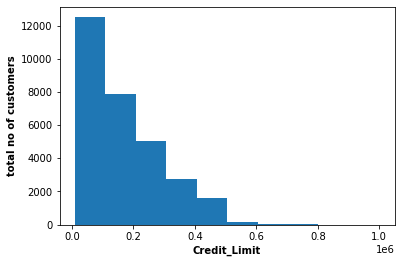

In [82]:
# Use histogram to view the distribution of credit limit

plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit', fontweight='bold')
plt.ylabel('total no of customers', fontweight='bold')
plt.show()

AGE

NOW WE WILL SEE  WHICH TYPE OF AGE GROUP USE CREDIT CARD MOST

In [83]:
df_cred['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

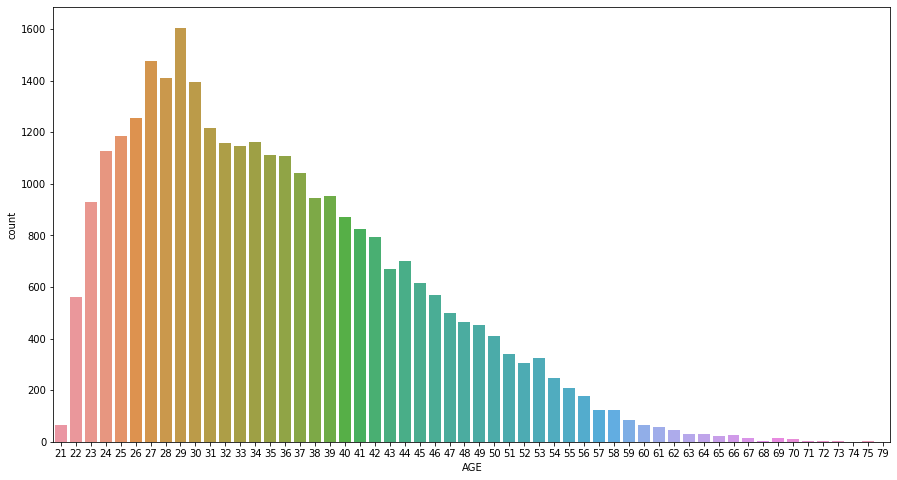

In [84]:
plt.figure(figsize=(15,8))
sns.countplot(df['AGE'], data=df_cred)

 **We see that age 27-30 have maximum credit card holders then gradually   decreases and after 60 is quite negligible**

In [85]:
#bill_amnt_df = df_cred[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

In [86]:
#sns.pairplot(data = bill_amnt_df)

In [87]:
df_cred['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [88]:
df_cred['AGE']=df_cred['AGE'].astype('int')

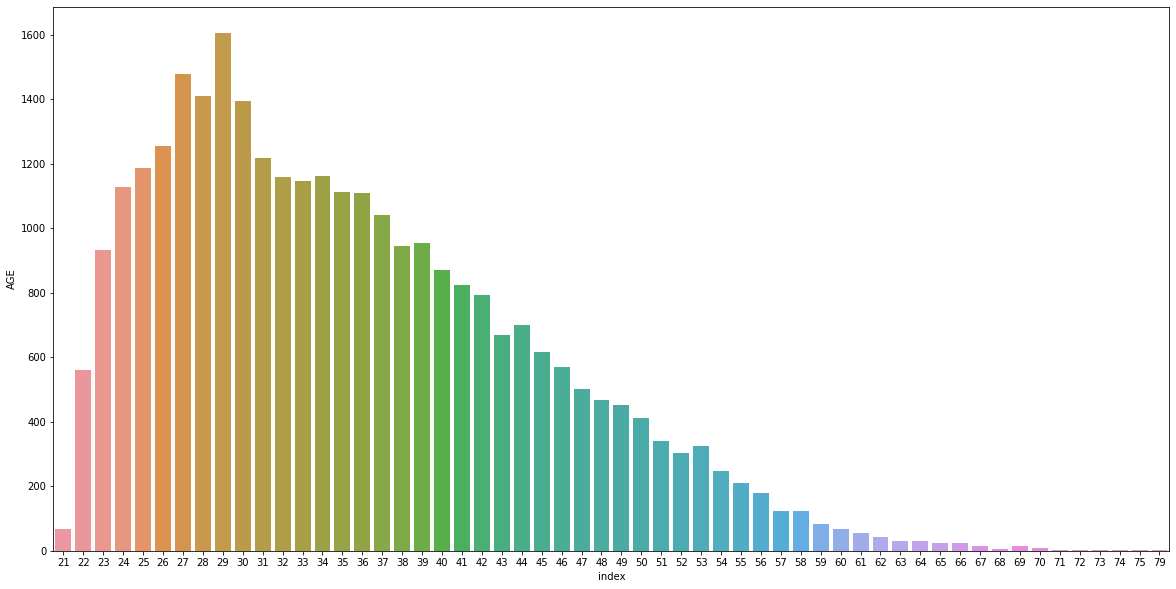

In [89]:
fig, axes = plt.subplots(ncols=1,figsize=(20,10))
Day_df=df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=Day_df,orient='v')

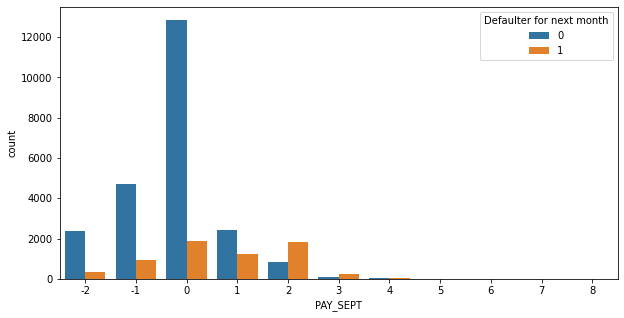

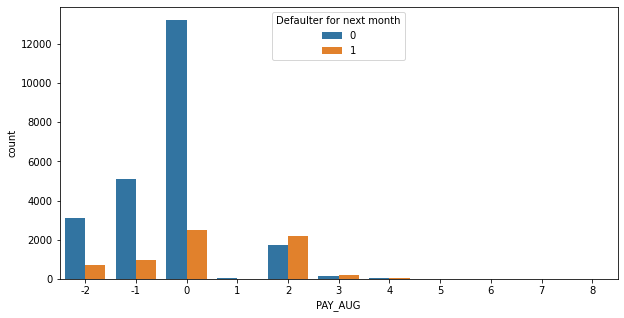

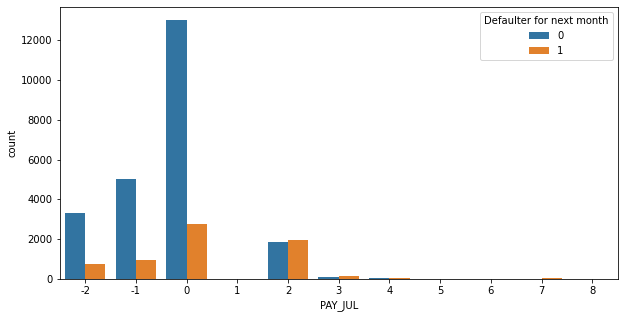

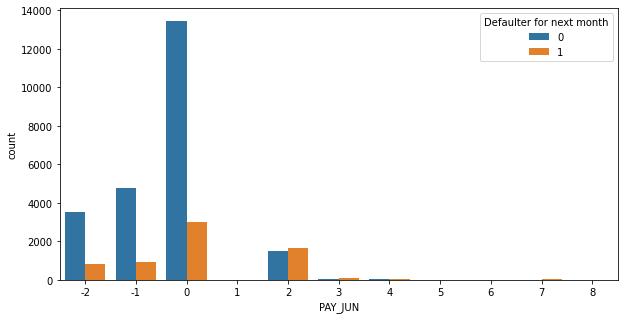

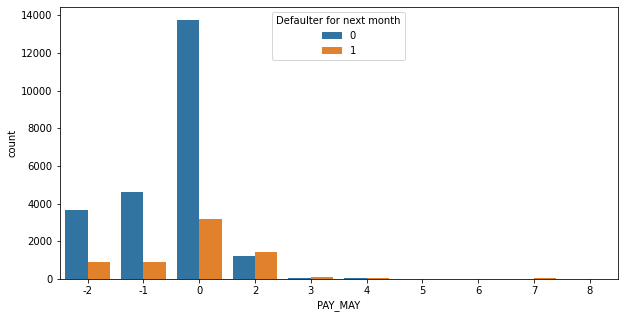

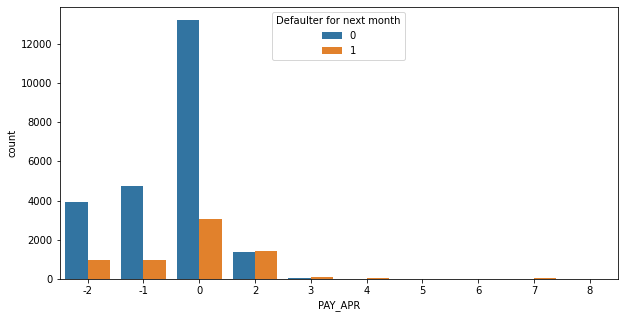

In [90]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulter for next month', data = df_cred)

In [91]:
#pay_amnt_df = df_cred[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'Defaulter for next month']]

#sns.pairplot(data = pay_amnt_df, hue='Defaulter for next month')

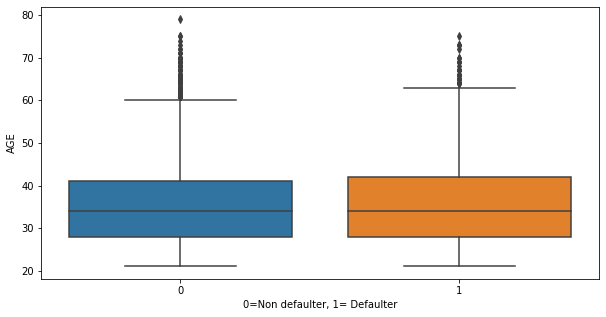

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter for next month',y='AGE',data=df_cred)
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()

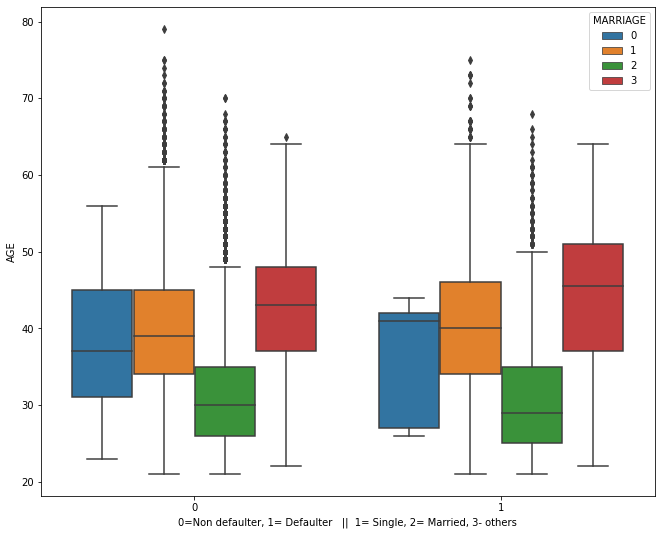

In [93]:
plt.figure(figsize=(11,9))
sns.boxplot(x='Defaulter for next month',hue= 'MARRIAGE', y='AGE', data=df_cred)
plt.xlabel("0=Non defaulter, 1= Defaulter   ||  1= Single, 2= Married, 3- others")
plt.show()

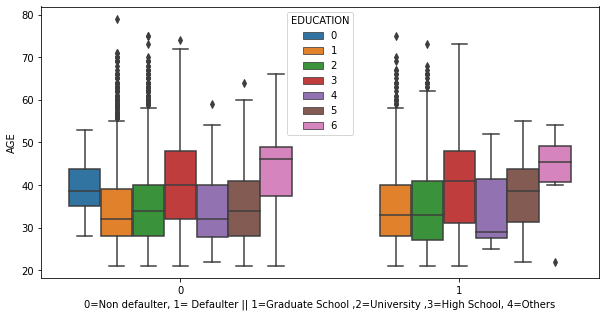

In [94]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter for next month',hue='EDUCATION', y='AGE',data=df_cred)
plt.xlabel("0=Non defaulter, 1= Defaulter || 1=Graduate School ,2=University ,3=High School, 4=Others")
plt.show()

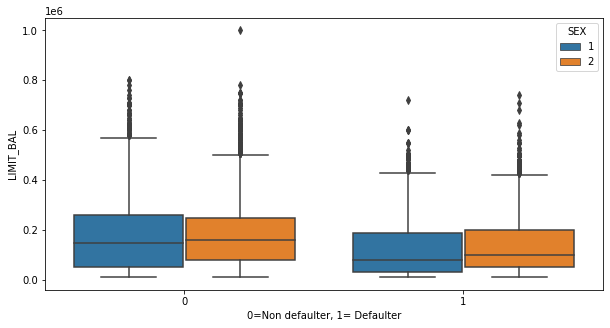

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter for next month',hue='SEX', y='LIMIT_BAL',data=df_cred)
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()

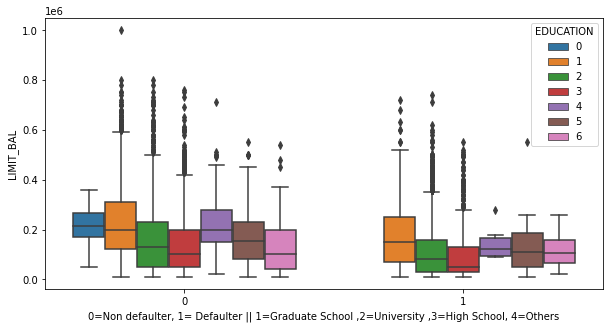

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter for next month',hue='EDUCATION', y='LIMIT_BAL',data=df_cred)
plt.xlabel("0=Non defaulter, 1= Defaulter || 1=Graduate School ,2=University ,3=High School, 4=Others")
plt.show()

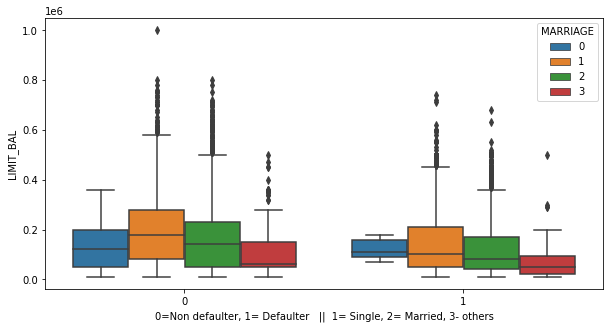

In [97]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter for next month',hue='MARRIAGE', y='LIMIT_BAL',data=df_cred)
plt.xlabel("0=Non defaulter, 1= Defaulter   ||  1= Single, 2= Married, 3- others")
plt.show()

In [98]:
df_cred["pay"]=df_cred["PAY_SEPT"]+df_cred["PAY_AUG"]+df_cred["PAY_JUL"]+df_cred["PAY_JUN"]+df_cred["PAY_MAY"]+df_cred["PAY_APR"]

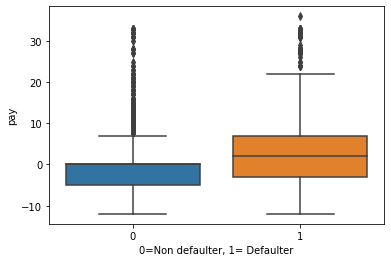

In [99]:
sns.boxplot(data=df_cred, y="pay",x="Defaulter for next month")
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()


In [100]:
df_cred["Defaulter for next month"].value_counts()

0    23364
1     6636
Name: Defaulter for next month, dtype: int64

In [101]:
def remove_outlier_using_IQR(df_cred):
    Q1=df_cred.quantile(0.25)
    Q3=df_cred.quantile(0.75)
    IQR=Q3-Q1
    df_final_output = df_cred[~((df_cred)<(Q1-1.5*IQR)) | (df_cred>(Q3+1.5*IQR))]
    return df_final_output

In [102]:
df_cred["Defaulter for next month"] = remove_outlier_using_IQR(df_cred["Defaulter for next month"])
df_cred["Defaulter for next month"].value_counts()

0    23364
1     6636
Name: Defaulter for next month, dtype: int64

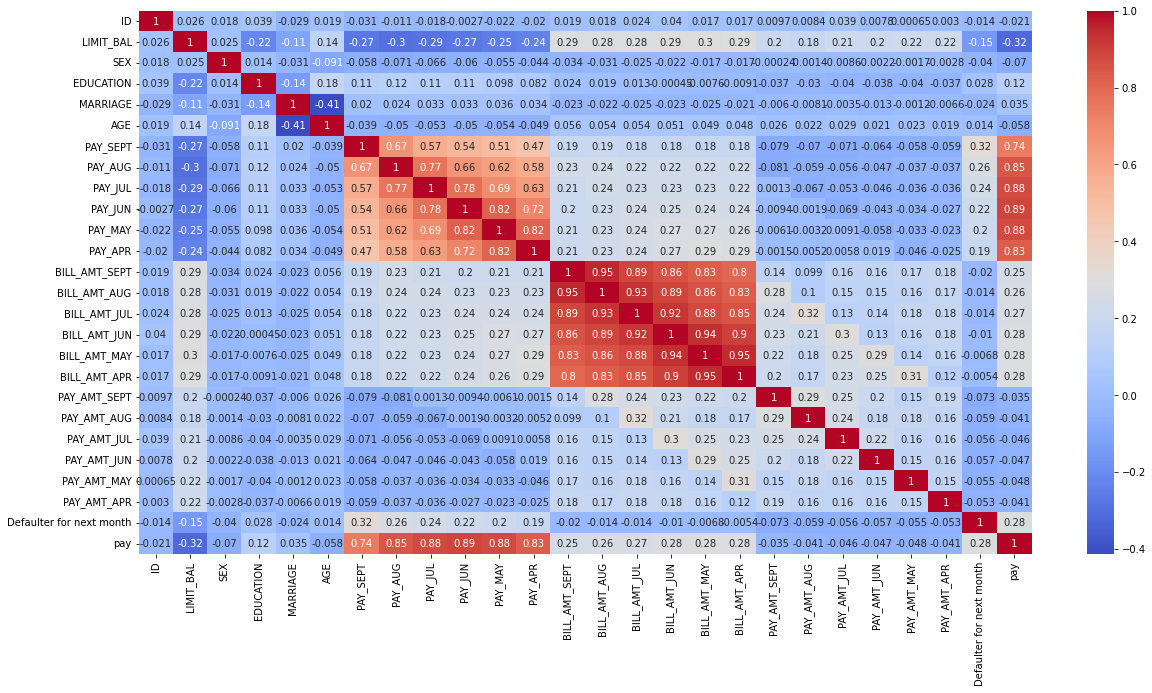

In [103]:
plt.figure (figsize= (20,10))
corelation= df_cred.corr()
sns.heatmap(corelation, annot=True, cmap='coolwarm')

In [104]:
df_cred = pd.get_dummies(df_cred,columns=['EDUCATION','SEX'])

In [105]:
df_cred.drop(['ID'], axis=1, inplace=True)
df_cred.drop(['AGE'], axis=1, inplace=True)


In [106]:
df_cred.drop(["BILL_AMT_MAY","BILL_AMT_APR","BILL_AMT_JUN","PAY_AMT_MAY","PAY_AMT_APR"], axis=1, inplace=True)

In [107]:
X= df_cred.drop(['Defaulter for next month'], axis = 1)
y= df_cred['Defaulter for next month']


X = X.apply(lambda x : (x-np.mean(x))/np.std(x))


In [108]:
X.head()

,LIMIT_BAL,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,pay,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_1,SEX_2
0,-1.136720,-1.057295,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.341942,-0.227086,-0.296801,-0.308063,-0.153635,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.810161,0.810161
1,-0.365981,0.858557,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.341942,-0.213588,-0.240005,-0.244230,0.694835,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.810161,0.810161
2,-0.597202,0.858557,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.250292,-0.191887,-0.240005,-0.244230,0.185753,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.810161,0.810161
3,-0.905498,-1.057295,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.221191,-0.169361,-0.228645,-0.237846,0.185753,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.810161,0.810161
4,-0.905498,-1.057295,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.221191,1.335034,0.271165,0.266434,-0.153635,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,1.234323,-1.234323


In [109]:
df_cred.head()

,LIMIT_BAL,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,Defaulter for next month,pay,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_1,SEX_2
0,20000,1,2,2,-1,-1,-2,-2,3913,3102,689,0,689,0,0,1,-2,0,0,1,0,0,0,0,0,1
1,120000,2,-1,2,0,0,0,2,2682,1725,2682,0,1000,1000,1000,1,3,0,0,1,0,0,0,0,0,1
2,90000,2,0,0,0,0,0,0,29239,14027,13559,1518,1500,1000,1000,0,0,0,0,1,0,0,0,0,0,1
3,50000,1,0,0,0,0,0,0,46990,48233,49291,2000,2019,1200,1100,0,0,0,0,1,0,0,0,0,0,1
4,50000,1,-1,0,-1,0,0,0,8617,5670,35835,2000,36681,10000,9000,0,-2,0,0,1,0,0,0,0,1,0


In [110]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Defaulter for next month, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [112]:
print(X_train.shape)
print(X_test.shape)

(21000, 25)
(9000, 25)


In [114]:
df_cred['Defaulter for next month'].value_counts()

0    23364
1     6636
Name: Defaulter for next month, dtype: int64

In [116]:
from collections import Counter

In [117]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()

# fit predictor and target variable
X_train_os, y_train_os = os.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_os))

Original dataset shape Counter({0: 16364, 1: 4636})
Resample dataset shape Counter({0: 16364, 1: 16364})


In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] }

logistic_model= GridSearchCV(LogisticRegression(), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 34 candidates, totalling 102 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [119]:
logistic_model.best_estimator_

LogisticRegression(C=0.2)

In [120]:
logistic_model.score(X_train_os, y_train_os)

0.6427523832803715

In [121]:
y_pred_logistic_train = logistic_model.predict(X_train_os)

In [122]:
y_pred_logistic_test = logistic_model.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [124]:
logistic_train_accuracy= accuracy_score(y_train_os, y_pred_logistic_train)
logistic_test_accuracy= accuracy_score(y_test, y_pred_logistic_test)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.6766988511366414
The accuracy on test data is  0.6925555555555556


In [125]:
logistic_test_precision= precision_score(y_test, y_pred_logistic_test)
logistic_test_recall= recall_score(y_test, y_pred_logistic_test)
logistic_test_f1score= f1_score(y_test, y_pred_logistic_test)
logistic_test_roc_auc= roc_auc_score(y_test, y_pred_logistic_test)
logistic_test_confusion_matrix= confusion_matrix(y_test, y_pred_logistic_test)

In [126]:
model_results = pd.DataFrame([['Logistic Regression', logistic_test_accuracy, logistic_test_precision, logistic_test_recall, 
                         logistic_test_f1score, logistic_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.692556,0.384523,0.6385,0.479985,0.67325


In [127]:
print(logistic_test_confusion_matrix)

[[4956 2044]
 [ 723 1277]]


In [132]:
from sklearn.tree import DecisionTreeClassifier


parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10],
              }

dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid= parameters, scoring = 'recall', cv=3, n_jobs=-1)
dt_model.fit(X_train_os, y_train_os)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [133]:
dt_model.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [134]:
dt_model.score(X_train_os, y_train_os)

0.7157174285015888

In [135]:
y_pred_dt_train = dt_model.predict(X_train_os)
y_pred_dt_test = dt_model.predict(X_test)

In [137]:
dt_train_accuracy= accuracy_score(y_train_os, y_pred_dt_train)
dt_test_accuracy= accuracy_score(y_test, y_pred_dt_test)

print("The accuracy on train data is ", dt_train_accuracy)
print("The accuracy on test data is ", dt_test_accuracy)

The accuracy on train data is  0.768516255194329
The accuracy on test data is  0.7777777777777778


In [138]:
dt_test_precision= precision_score(y_test, y_pred_dt_test)
dt_test_recall= recall_score(y_test, y_pred_dt_test)
dt_test_f1score= f1_score(y_test, y_pred_dt_test)
dt_test_roc_auc= roc_auc_score(y_test, y_pred_dt_test)
dt_test_confusion_matrix= confusion_matrix(y_test, y_pred_dt_test)

In [139]:
model = pd.DataFrame([['Decision Tree Classifier', dt_test_accuracy, dt_test_precision, dt_test_recall, 
                         dt_test_f1score, dt_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.692556,0.384523,0.638500,0.479985,0.673250
1,Decision Tree Classifier,0.777778,0.498246,0.648402,0.563492,0.731464


In [140]:
print(dt_test_confusion_matrix)

[[6280 1430]
 [ 770 1420]]


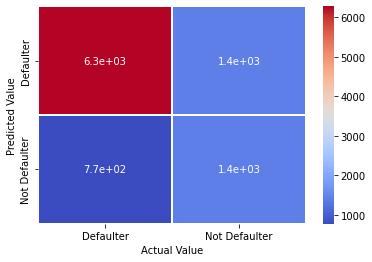

In [141]:
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(dt_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight='balanced')
xgb.fit(X_train_os, y_train_os)

XGBClassifier(class_weight='balanced')

In [155]:
xgb.score(X_train_os, y_train_os)

0.7286115864091909

In [157]:
y_pred_default_xgb_train = xgb.predict(X_train_os)
y_pred_default_xgb_test = xgb.predict(X_test)

In [158]:
default_xgb_train_accuracy= accuracy_score(y_train_os, y_pred_default_xgb_train)
default_xgb_test_accuracy= accuracy_score(y_test, y_pred_default_xgb_test)

print("The accuracy on train data is ", default_xgb_train_accuracy)
print("The accuracy on test data is ", default_xgb_test_accuracy)

The accuracy on train data is  0.7286115864091909
The accuracy on test data is  0.765959595959596


In [160]:
default_xgb_test_precision= precision_score(y_test, y_pred_default_xgb_test)
default_xgb_test_recall= recall_score(y_test, y_pred_default_xgb_test)
default_xgb_test_f1score= f1_score(y_test, y_pred_default_xgb_test)
default_xgb_test_roc_auc= roc_auc_score(y_test, y_pred_default_xgb_test)
default_xgb_test_confusion_matrix= confusion_matrix(y_test, y_pred_default_xgb_test)

In [161]:
model = pd.DataFrame([['Default XGBoost Classifier', default_xgb_test_accuracy, default_xgb_test_precision, default_xgb_test_recall, 
                         default_xgb_test_f1score, default_xgb_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.692556,0.384523,0.638500,0.479985,0.673250
1,Decision Tree Classifier,0.777778,0.498246,0.648402,0.563492,0.731464
2,Decision Tree Classifier,0.777778,0.498246,0.648402,0.563492,0.731464
3,Default XGBoost Classifier,0.765960,0.478511,0.645662,0.549660,0.722896
